In [1]:
from selenium import webdriver
driver = webdriver.Chrome('D:\chromedriver_win32\chromedriver.exe')
driver.get('https://comicbus.live/online/a-1268.html?ch=1041')

In [5]:
# driver.find_element_by_id('TheImg')
# driver.page_source
from bs4 import BeautifulSoup
soup=BeautifulSoup(driver.page_source,'lxml')

In [26]:
imgurl='https:'+soup.select_one('#TheImg').get('src')

'https://img1.8comic.com/3/1268/1041/016_CyP.jpg'

In [31]:
import requests
res=requests.get(imgurl)
with open('test.jpg','wb') as f:
    f.write(res.content)

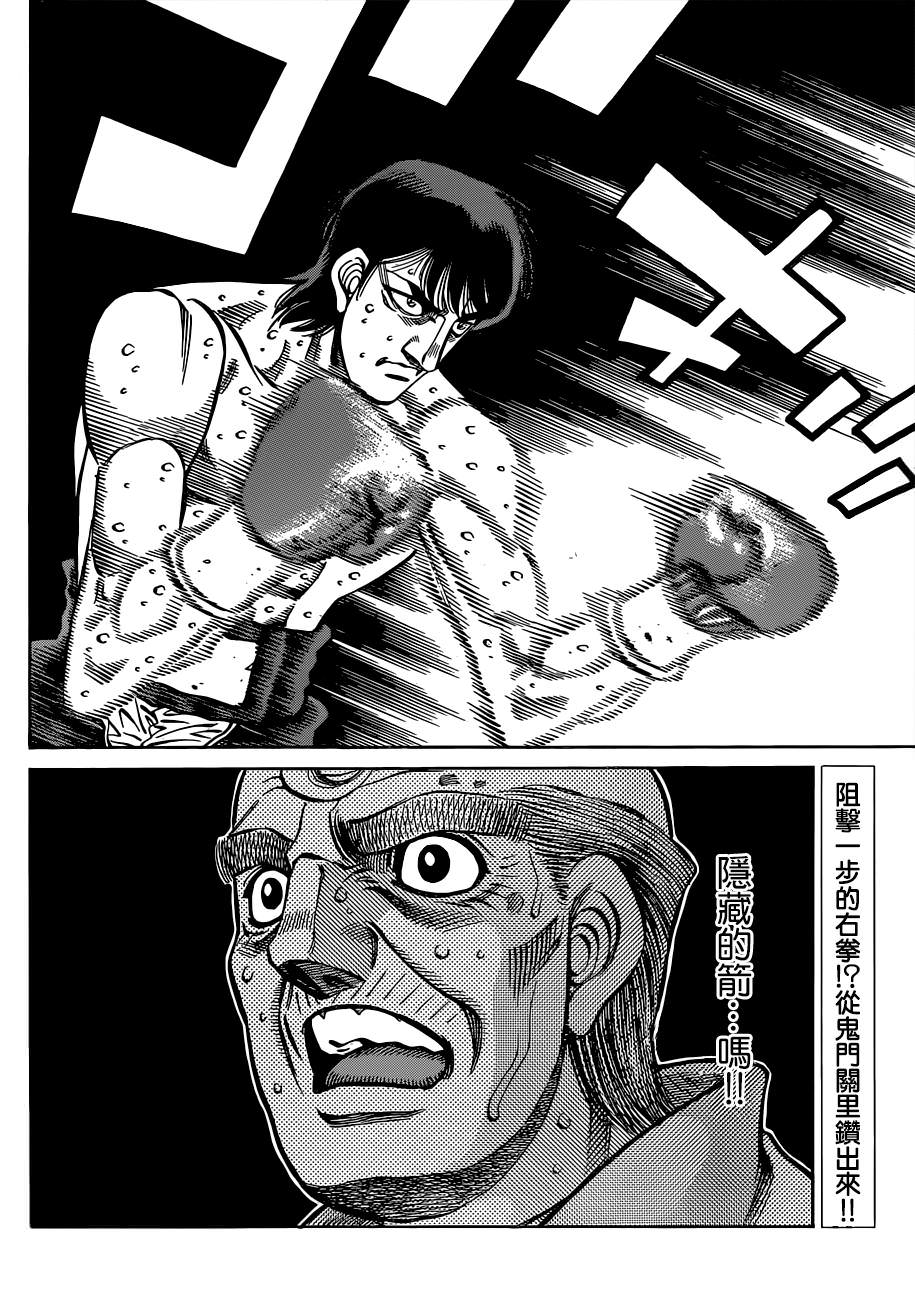

In [32]:
from PIL import Image
Image.open('test.jpg')

In [18]:
totalpage = int(soup.select_one('#pagenum').text.split('/')[1].split('頁')[0])

In [34]:
import time
pageurl='https://comicbus.live/online/a-1268.html?ch=1041-{}'
for page in range(totalpage):
    driver.get(pageurl.format(page+1))
    soup=BeautifulSoup(driver.page_source,'lxml')
    imgurl='https:'+soup.select_one('#TheImg').get('src')
    res=requests.get(imgurl)
    with open('1041-{}.jpg'.format(page+1),'wb') as f:
        f.write(res.content)
    time.sleep(2)